# Processing TESS sectors >= 27 data for TOI4504

In [1]:
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
# from cs_flux_data import Transit
%matplotlib inline
path = '../data/TOI-4504/'

C_TRANSITS = [2458401.41, 2458483.21, 2458565.09, 2458647.33, 2459065.24, 2459148.48, 2459231.11, 2459313.25, 2459976.05, 2460059.62, 2460142.60]
# spoc_sectors = [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 61, 62, 63, 64, 65, 67, 68, 69, 87, 88, 89, 90, 94]
# spoc_sectors = [28, 31, 34, 37, 61, 64, 67, 88, 89, 94]
spoc_sectors = [97]


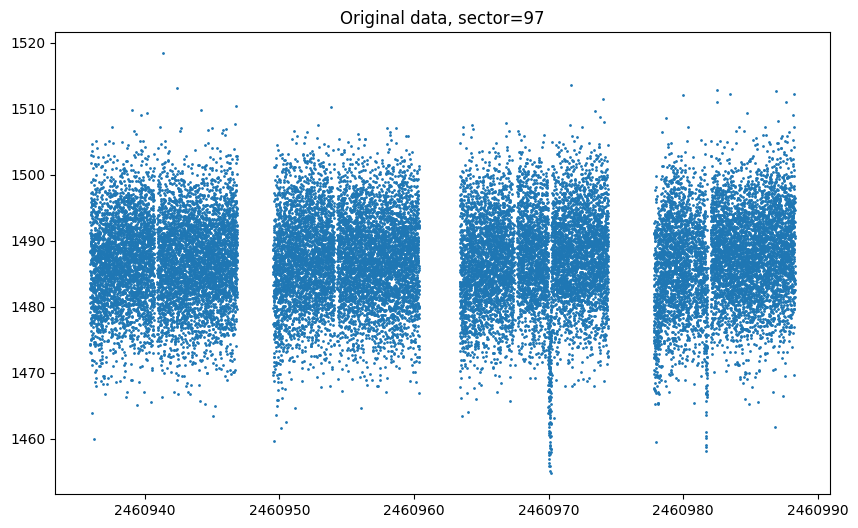

In [10]:
spoc_dfs = []
for sector in spoc_sectors:
    full_path = path + f"downloads/{sector}_SPOC_120.csv"
    # full_path = path + f"downloads/{sector}_SPOC_20.csv"
    # full_path = path + f"downloads/{sector}_QLP_200.csv"
    df = csv2df(full_path)
    df = tesstime2bjd(df)
    spoc_dfs.append(df)
    plot_this(df.time, [df.flux], ["flux"], title=f"Original data, {sector=}")

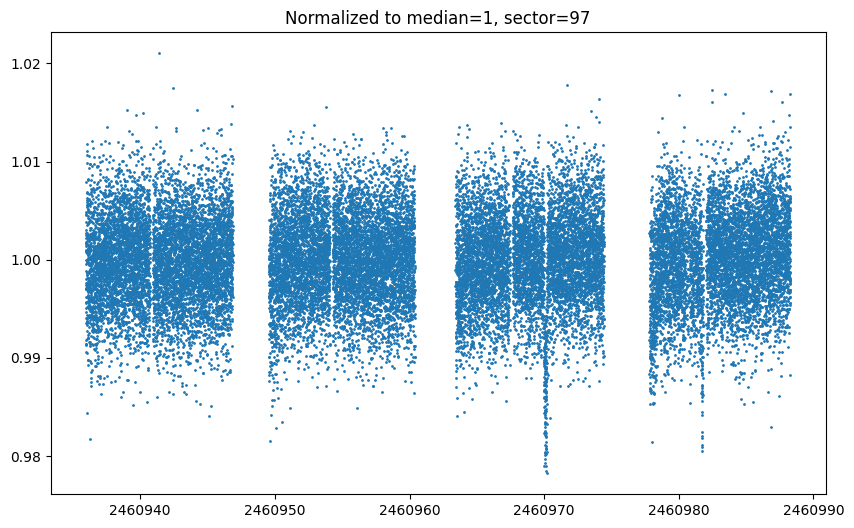

In [11]:
for df, sector in zip(spoc_dfs, spoc_sectors):
    median = median_flux(df)
    df = scale_flux(df, 1/median)
    plot_this(df.time, [df.flux], ["flux"], title=f"Normalized to median=1, {sector=}")

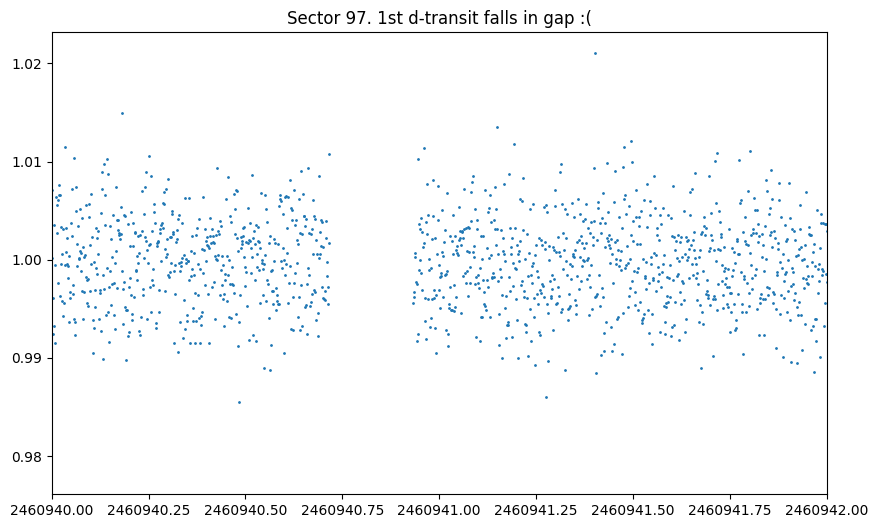

In [12]:
# plot the last sector again
plot_this(df.time, [df.flux], ["flux"], title=f"Sector 97. 1st d-transit falls in gap :(", left=2460940, right=2460942)

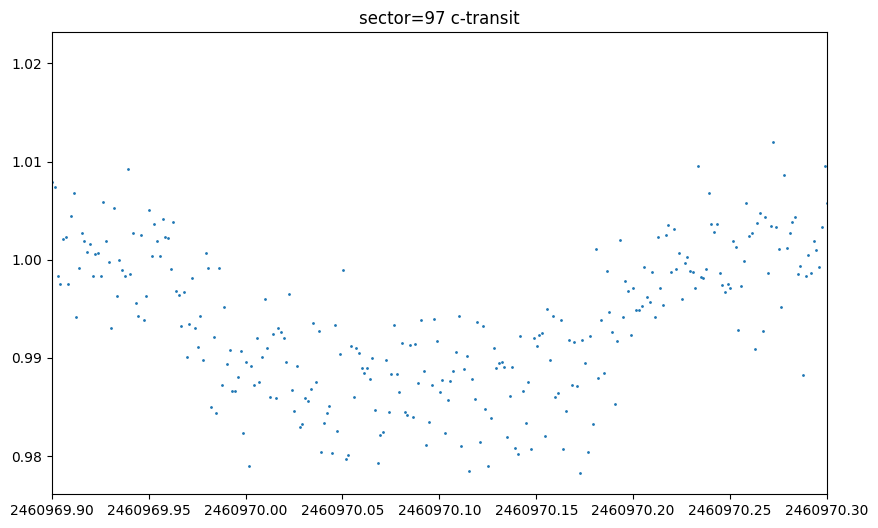

In [13]:
# plot the last sector again
plot_this(df.time, [df.flux], ["flux"], title=f"{sector=} c-transit", left=2460969.9, right=2460970.3)

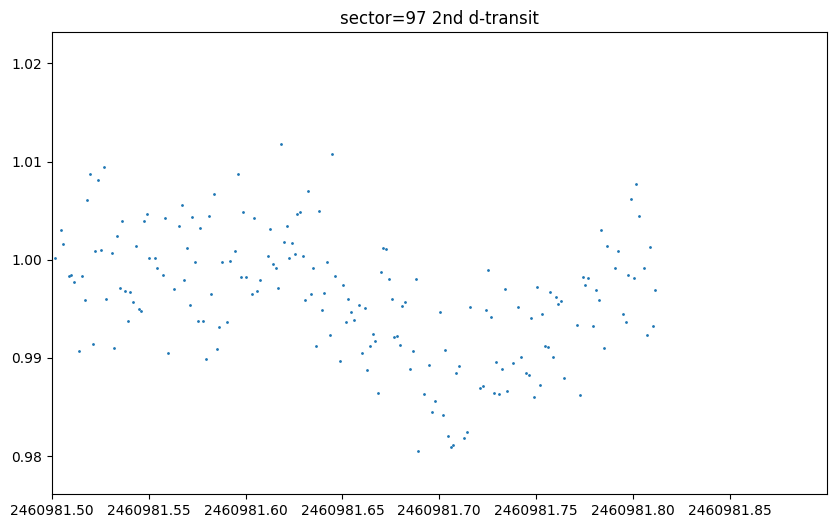

In [14]:
# and again ...
plot_this(df.time, [df.flux], ["flux"], title=f"{sector=} 2nd d-transit", left=2460981.5, right=2460981.9)

In [22]:
full_path = path + f"95_SPOC_120_p.csv"
df2csv(df, full_path)

In [23]:
full_path

'../data/TOI-4504/95_SPOC_120_p.csv'

In [19]:
df

,time,flux,flux_err
0,2.460883e+06,1.005446,0.005187
1,2.460883e+06,0.993426,0.005175
2,2.460883e+06,0.993544,0.005174
3,2.460883e+06,0.999723,0.005170
4,2.460883e+06,0.999815,0.005167
...,...,...,...
16381,2.460907e+06,0.998163,0.005096
16382,2.460907e+06,1.001450,0.005106
16383,2.460907e+06,1.001472,0.005101
16384,2.460907e+06,0.990134,0.005099


In [ ]:
for df, sector in zip(spoc_dfs, spoc_sectors):
    full_path = path + f"{sector}/{sector}_SPOC_120_p.csv"
    df2csv(df, full_path)

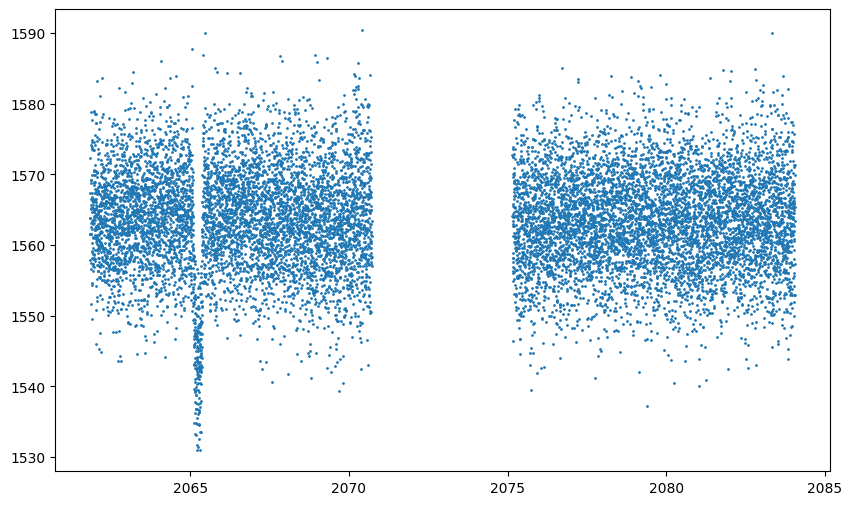

In [4]:
plot_flux_df(transit28.df_download)